<img src="https://shwetkm.github.io/upxlogo.png"></img>

In [1]:
# read the data into a Pandas DataFrame
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [2]:
# print the first 5 rows of data
#predict whether there is diabetes or not
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#the distribution of data
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#spread of negative cases and positive cases
pima.groupby('label')['skin'].count()

label
0    500
1    268
Name: skin, dtype: int64

In [5]:
# define  X and y
#creating a model with just the following attributes as dependent variables
#feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
#X = pima[feature_cols]
X = pima.drop('label',1)
y = pima.label

# Section-1

Training model with train and test split data

In [6]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

C:\Users\sudhi\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression #importing from sklearn
logreg = LogisticRegression() #initializing the model
logreg.fit(X_train, y_train) #fitting on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [9]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.75


Null accuracy: accuracy that could be achieved by always predicting the most frequent class

In [10]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    122
1     70
Name: label, dtype: int64

In [11]:
# calculate the percentage of ones
y_test.mean()

0.3645833333333333

In [12]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6354166666666667

In [13]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6354166666666667

So othe null accuracy score is 0.677 and our model accuracy is 0.713 which is little better than null accuracy

### Let's Plot Confusion Matrix

In [14]:
conf = (metrics.confusion_matrix(y_test, y_pred_class))

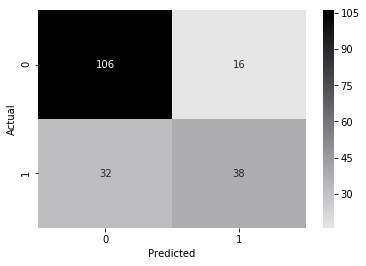

In [15]:
#plotting the confusion matrix
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Let's apply random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=120, criterion='entropy')

In [17]:
rf_clf.fit(X_train, y_train) #fitting the train data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=120, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [18]:
# make class predictions for the testing set
rf_pred_test = rf_clf.predict(X_test)

In [19]:
print(metrics.accuracy_score(y_test, rf_pred_test))

0.760416666667


In [20]:
#confusion matrix for random forest
rf_conf = (metrics.confusion_matrix(y_test, rf_pred_test))

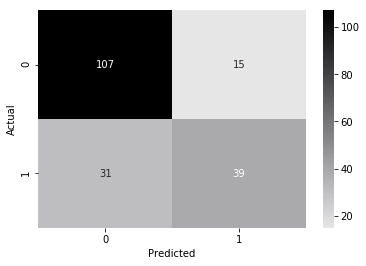

In [21]:
#plotting the confusion matrix
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(rf_conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Training model with cross-validation


### Steps for K-fold cross-validation

Split the dataset into K equal partitions (or "folds").

Use fold 1 as the testing set and the union of the other folds as the training set.

Calculate testing accuracy.

Repeat steps 2 and 3 K times, using a different fold as the testing set each time.

Use the average testing accuracy as the estimate of out-of-sample accuracy.

In [22]:
from sklearn.cross_validation import cross_val_score #importing cross validation package
# 10-fold cross-validation on logistic regression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy') #fitting logistic regression to whole data with 10 fold
print(scores)

[ 0.76623377  0.75324675  0.75974026  0.80392157  0.76470588]


In [23]:
print(scores.mean()) #mean of all the accuracies of logistic regression

0.76956964604


#### comparing with Random forest

In [24]:
rf_clf = RandomForestClassifier(n_estimators=50, criterion='entropy')

In [25]:
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print(rf_scores)

[ 0.77922078  0.75324675  0.74025974  0.83660131  0.73202614]


In [26]:
print(rf_scores.mean()) #mean of all the acccuracies

0.768270944742


We can see that the accuracy has been increased when performed Cross-Validation in random forest classifier as well as for logistic regression

Now train the model on whole data and predict the future data points...

In [27]:
rf_clf.fit(X,y) #random forest on whole data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [28]:
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The accuracy scores for

            Random Forest on train/test split : 75                   Logistic Regression on train/test split: 75.5  
            Random Forest on Cross Validation : 77.09                Logistic Regression on Cross Validation : 76.8
            
So with cross-validataion there is high probability of increasing model accuracy
    

### Adjusting the classification threshold

In [29]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [30]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

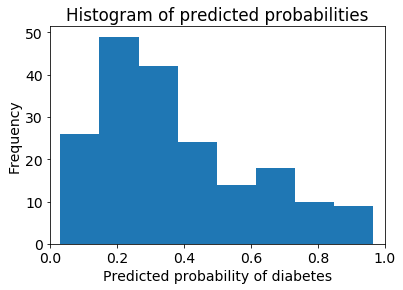

In [31]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions.

Threshold can be adjusted to increase sensitivity or specificity
Sensitivity and specificity have an inverse relationship

## ROC Curves and Area Under the Curve (AUC)

Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

Answer: Plot the ROC curve!

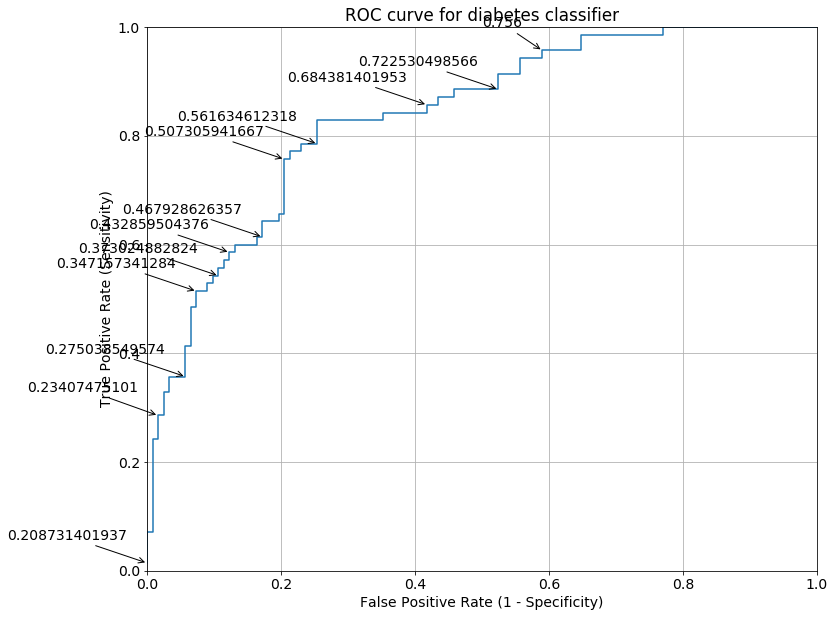

In [34]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
plt.figure(figsize=(12,10))
import seaborn
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
thresholds[0] = 0.756
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
for label, x, y in zip(reversed(thresholds[range(0,60,5)]), fpr[range(0,60,5)], tpr[range(0,60,5)]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',

        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### ROC

ROC curve tries to evaluate how well the model has achieved the seperation between the classes at all threshold values

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

In [124]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [125]:
evaluate_threshold(0.5) #at the middle the sensitivity and specificity are plotted

('Sensitivity:', 0.54285714285714282)
('Specificity:', 0.89344262295081966)


In [126]:
evaluate_threshold(0.7)
#with increase in threshold specificity has increased

('Sensitivity:', 0.32857142857142857)
('Specificity:', 0.96721311475409832)


In [127]:
#with decrease in threshold sensitivity has increased
evaluate_threshold(0.2)

('Sensitivity:', 0.95714285714285718)
('Specificity:', 0.4098360655737705)


<h1>Conclusion:</h1>
    In this way business can understand where should the threshold be set so as to maximize Sensitivity or Specificity.
    

### Reference

  
http://www.navan.name/roc/
    
https://www.youtube.com/watch?v=OAl6eAyP-yo&feature=youtu.be